In [63]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! ls -al ../data/athlete_events/

total 70176
drwx------@ 14 amy  staff      448 22 ноя 20:16 .
drwxr-xr-x   8 amy  staff      256 22 ноя 20:26 ..
-rw-rw-r--@  1 amy  staff  2992729 18 окт  2021 athlete_events00.csv
-rw-rw-r--@  1 amy  staff  2992655 18 окт  2021 athlete_events01.csv
-rw-rw-r--@  1 amy  staff  2992674 18 окт  2021 athlete_events02.csv
-rw-rw-r--@  1 amy  staff  2992639 18 окт  2021 athlete_events03.csv
-rw-rw-r--@  1 amy  staff  2992651 18 окт  2021 athlete_events04.csv
-rw-rw-r--@  1 amy  staff  2992706 18 окт  2021 athlete_events05.csv
-rw-rw-r--@  1 amy  staff  2992619 18 окт  2021 athlete_events06.csv
-rw-rw-r--@  1 amy  staff  2992729 18 окт  2021 athlete_events07.csv
-rw-rw-r--@  1 amy  staff  2992592 22 окт  2021 athlete_events08.csv
-rw-rw-r--@  1 amy  staff  2992695 18 окт  2021 athlete_events09.csv
-rw-rw-r--@  1 amy  staff  2992621 18 окт  2021 athlete_events10.csv
-rw-rw-r--@  1 amy  staff  2992598 18 окт  2021 athlete_events11.csv


### Task 1. Making function that aggregates files of certain extension from directory

In [3]:
def aggregate_data(path_to_data, extension):
    df = pd.DataFrame()    # Empty dataframe
    for file in os.listdir(path_to_data):
        if file.endswith('.' + extension):
            if df.empty:
                df = pd.read_csv(path_to_data + file)
            else:
                df = pd.concat([df, pd.read_csv(path_to_data + file)], axis = 0)
    return df

In [4]:
olympics_data_raw = aggregate_data('../data/athlete_events/', 'csv')
olympics_data_raw

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN
3,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
4,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22386,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
22387,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
22388,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
22389,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### Task 2. Cleaning up dataframe

In [5]:
olympics_data = pd.DataFrame.drop_duplicates(olympics_data_raw) # removed duplicates from my dataframe
olympics_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN
3,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
4,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22386,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
22387,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
22388,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
22389,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
pd.DataFrame.describe(olympics_data)

,ID,Age,Height,Weight,Year
count,269730.000000,260413.000000,210915.000000,208202.000000,269723.000000
mean,68264.823249,25.455549,175.339743,70.701617,1978.622913
std,39026.271025,6.178193,10.524665,14.349885,29.751999
min,1.000000,10.000000,127.000000,7.000000,1896.000000
25%,34655.250000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,240.000000,340.000000,214.000000,2016.000000


### Observations with incorrect values in 'Sex' column:

In [7]:
olympics_data[(olympics_data['Sex'] != 'M') & (olympics_data['Sex'] != 'F')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22409,113716,Pietro Spec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,79609,Pavel Mike,G,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver
74,79630,Anatoly Mikhaylin,G,37.0,NaN,NaN,Russia,RUS,1996 Summer,1996.0,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,NaN
22463,124516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
olympics_data = olympics_data[olympics_data['Sex'].notna()] # removed observations with IDs 22409 and 22463
olympics_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN
3,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
4,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22386,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
22387,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
22388,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
22389,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [9]:
olympics_data['Sex'] = olympics_data['Sex'].replace('G', 'M') # replaced 'G' with 'M' in column 'Sex'
olympics_data

/var/folders/l8/gdl_qtnj2h54h26xktn23g740000gn/T/ipykernel_7402/1009863747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics_data['Sex'] = olympics_data['Sex'].replace('G', 'M') # replaced 'G' with 'M' in column 'Sex'


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN
3,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
4,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22386,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
22387,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
22388,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
22389,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [10]:
olympics_data[(olympics_data['Sex'] != 'M') & (olympics_data['Sex'] != 'F')] # no such left

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


### Removing observations that look suspicious:

In [11]:
olympics_data = olympics_data[(olympics_data['Age'] != 240)
                              & (olympics_data['Height'] != 340)
                              & (olympics_data['Weight'] != 7)]
olympics_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN
3,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
4,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22386,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
22387,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
22388,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
22389,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [12]:
pd.DataFrame.describe(olympics_data) # looks more like it!

,ID,Age,Height,Weight,Year
count,269725.000000,260410.000000,210913.000000,208200.000000,269721.000000
mean,68264.777700,25.454718,175.338950,70.701955,1978.623036
std,39026.193987,6.163905,10.518604,14.349267,29.751764
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34656.000000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [13]:
olympics_data[olympics_data['Weight'] == 25] # keeping this one

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
18013,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
18014,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
18015,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
18016,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
18017,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
18018,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN


In [14]:
olympics_data[olympics_data['Weight'] == 214] # and this

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
319,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008.0,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
320,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Heavyweight,NaN


### Task 3. Ages of youngest athletes on 1992 year Olympics

In [15]:
youngest_male_1992 = int(olympics_data[(olympics_data['Year'] == 1992)
                                       & (olympics_data['Sex'] == 'M')]['Age'].min())

print(f'Youngest male athlete on 1992 year Olympics was {youngest_male_1992} years old.')

Youngest male athlete on 1992 year Olympics was 11 years old.


In [16]:
youngest_female_1992 = int(olympics_data[(olympics_data['Year'] == 1992)
                                         & (olympics_data['Sex'] == 'F')]['Age'].min())

print(f'Youngest female athlete on 1992 year Olympics was {youngest_female_1992} years old.')

Youngest female athlete on 1992 year Olympics was 12 years old.


### Task 4. Mean and standart deviation of height for male and female athletes

In [17]:
mean_height_male = round(olympics_data[olympics_data['Sex'] == 'M']['Height'].mean(), 1)
std_height_male = round(olympics_data[olympics_data['Sex'] == 'M']['Height'].std(), 1)

print(f'For male athletes mean height is {mean_height_male} cm, standart deviation of height is {std_height_male} cm.')

For male athletes mean height is 178.9 cm, standart deviation of height is 9.4 cm.


In [18]:
mean_height_female = round(olympics_data[olympics_data['Sex'] == 'F']['Height'].mean(), 1)
std_height_female = round(olympics_data[olympics_data['Sex'] == 'F']['Height'].std(), 1)

print(f'For female athletes mean height is {mean_height_female} cm, standart deviation of height is {std_height_female} cm.')

For female athletes mean height is 167.8 cm, standart deviation of height is 8.8 cm.


### Task 5. Mean and standart deviation of height for female tennis players in 2000

In [19]:
female_tennis_players_2000 = olympics_data[(olympics_data['Sport'] == 'Tennis')
                                           & (olympics_data['Sex'] == 'F')
                                           & (olympics_data['Year'] == 2000)
                                          ]

mean_height = round(female_tennis_players_2000['Height'].mean(), 1)
std_height = round(female_tennis_players_2000['Height'].std(), 1)

print(f'For female tennis players in 2000 mean height is {mean_height} cm, standart deviation of height is {std_height} cm.')

For female tennis players in 2000 mean height is 171.8 cm, standart deviation of height is 6.5 cm.


### Task 6. Which sport the heaviest athlete in 2006 participated in?

In [20]:
max_weight_2006 = olympics_data[olympics_data['Year'] == 2006]['Weight'].max()

sport = list(olympics_data[(olympics_data['Year'] == 2006) & (olympics_data['Weight'] == max_weight_2006)]['Sport'])[0]

print(f'The heaviest athlete in 2006 participated in {sport}.')

The heaviest athlete in 2006 participated in Skeleton.


### Task 7. How many gold medals were received by female athletes between 1980 and 2010?

In [21]:
gold_medals = olympics_data[(olympics_data['Sex'] == 'F')
              & (olympics_data['Year'] >= 1980)
              & (olympics_data['Year'] <= 2010)
            & (olympics_data['Medal'] == 'Gold')
             ].shape[0]

print(f'{gold_medals} gold medals were received by female athletes between 1980 and 2010.')

2249 gold medals were received by female athletes between 1980 and 2010.


### Task 8. How many times has John Aalberg participated in Olympics over the years?

In [22]:
times_participated = olympics_data[olympics_data['Name'] == 'John Aalberg'].shape[0]

print(f'John Aalberg participated in Olympics {times_participated} times over the years.')

John Aalberg participated in Olympics 8 times over the years.


### Task 9. Which age category is the most represented in Olympics?

In [23]:
# Grouping observations by age intervals of interest:

olympics_data.groupby(pd.cut(olympics_data['Age'], np.arange(15, 56, 10), right=False)).count()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Age,,,,,,,,,,,,,,,
"[15, 25)",130008,130008,130008,130008,106510,105220,130008,130007,130007,130005,130005,130005,130005,130005,17839
"[25, 35)",110811,110811,110811,110811,91350,90433,110811,110811,110810,110810,110810,110810,110810,110810,18303
"[35, 45)",14806,14806,14806,14806,9651,9281,14806,14806,14806,14806,14806,14806,14806,14806,2259
"[45, 55)",2929,2929,2929,2929,1410,1312,2929,2929,2929,2929,2929,2929,2929,2929,443


In [24]:
print('The most represented age category is [15, 25) years old.')

The most represented age category is [15, 25) years old.


### Task 10. How many kinds of sport were there in 2002 and 1994? Calculate the difference.

In [25]:
set(olympics_data[olympics_data['Year'] == 2002]['Sport'].values)

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Curling',
 'Figure Skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboarding',
 'Speed Skating'}

In [26]:
set(olympics_data[olympics_data['Year'] == 1994]['Sport'].values)

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Figure Skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track Speed Skating',
 'Ski Jumping',
 'Speed Skating'}

In [27]:
sports_2002 = len(set(olympics_data[olympics_data['Year'] == 2002]['Sport'].values))
sports_1994 = len(set(olympics_data[olympics_data['Year'] == 1994]['Sport'].values))

In [28]:
print(f'There were {sports_1994} different kinds of sport in 1994 and {sports_2002} - in 2002.')
print(f'It increased by {sports_2002 - sports_1994}.')

There were 12 different kinds of sport in 1994 and 15 - in 2002.
It increased by 3.


### Task 11. Top 3 countries for each medal type in Winter and Summer Olympics

#### Winter Olympics top-3:

In [29]:
# Gold medals:

olympics_data[(olympics_data['Season'] == 'Winter')
             & (olympics_data['Medal'] == 'Gold')
             ].groupby(by='NOC').count().sort_values(by='Medal', ascending=False).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
NOC,,,,,,,,,,,,,,
CAN,305,305,305,305,250,247,305,305,305,305,305,305,305,305
URS,250,250,250,250,235,224,250,250,250,250,250,250,250,250
USA,166,166,166,166,139,134,166,166,166,166,166,166,166,166


In [30]:
# Silver medals:

olympics_data[(olympics_data['Season'] == 'Winter')
             & (olympics_data['Medal'] == 'Silver')
             ].groupby(by='NOC').count().sort_values(by='Medal', ascending=False).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
NOC,,,,,,,,,,,,,,
USA,308,308,308,308,248,253,308,308,308,308,308,308,308,308
CAN,199,199,199,199,182,182,199,199,199,199,199,199,199,199
NOR,165,165,165,165,138,120,165,165,165,165,165,165,165,165


In [31]:
# Bronze medals:

olympics_data[(olympics_data['Season'] == 'Winter')
             & (olympics_data['Medal'] == 'Bronze')
             ].groupby(by='NOC').count().sort_values(by='Medal', ascending=False).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
NOC,,,,,,,,,,,,,,
FIN,215,215,215,215,210,210,215,215,215,215,215,215,215,215
SWE,177,177,177,177,137,137,177,177,177,177,177,177,177,177
USA,161,161,161,161,129,129,161,161,161,161,161,161,161,161


#### Summer Olympics top-3:

In [32]:
# Gold medals:

olympics_data[(olympics_data['Season'] == 'Summer')
             & (olympics_data['Medal'] == 'Gold')
             ].groupby(by='NOC').count().sort_values(by='Medal', ascending=False).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
NOC,,,,,,,,,,,,,,
USA,2472,2472,2472,2461,2103,1993,2472,2472,2472,2472,2472,2472,2472,2472
URS,832,832,832,832,759,763,832,832,832,832,832,832,832,832
GBR,635,635,635,615,323,341,635,635,635,635,635,635,635,635


In [33]:
# Silver medals:

olympics_data[(olympics_data['Season'] == 'Summer')
             & (olympics_data['Medal'] == 'Silver')
             ].groupby(by='NOC').count().sort_values(by='Medal', ascending=False).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
NOC,,,,,,,,,,,,,,
USA,1333,1333,1333,1311,1075,1050,1333,1333,1333,1333,1333,1333,1333,1333
GBR,729,729,729,674,356,378,729,729,729,729,729,729,729,729
URS,635,635,635,635,561,562,635,635,635,635,635,635,635,635


In [34]:
# Bronze medals:

olympics_data[(olympics_data['Season'] == 'Summer')
             & (olympics_data['Medal'] == 'Bronze')
             ].groupby(by='NOC').count().sort_values(by='Medal', ascending=False).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
NOC,,,,,,,,,,,,,,
USA,1197,1197,1197,1185,903,858,1197,1197,1197,1197,1197,1197,1197,1197
GER,649,649,649,644,498,497,649,649,649,649,649,649,649,649
GBR,620,620,620,593,353,349,620,620,620,620,620,620,620,620


### Task 12. Standartization of 'Height' variable

In [35]:
heights_without_NAs = olympics_data[olympics_data['Height'].notna()]['Height']

Height_z_scores = stats.zscore(heights_without_NAs)
Height_z_scores

0        1.108615
1        1.108615
2        1.108615
3        1.108615
4        1.393824
           ...   
22386    0.348056
22387    0.062846
22388    0.062846
22389    0.918475
22390    0.918475
Name: Height, Length: 210913, dtype: float64

### Task 13. Min-Max Normalization of 'Height' variable (using MinMaxScaler from sklearn)

In [59]:
scaler = preprocessing.MinMaxScaler() # function for Min-Max Normalization from sklean library

In [40]:
Height_min_max_scaled = scaler.fit_transform(olympics_data[['Height']])
Height_min_max_scaled

array([[0.60606061],
       [0.60606061],
       [0.60606061],
       ...,
       [0.49494949],
       [0.58585859],
       [0.58585859]])

### Task 14. Comparing age, weight and height of male and female athletes in Winter Olympics

In [72]:
winter_olympics = olympics_data[(olympics_data['Season'] == 'Winter')][['Sex', 'Age', 'Height', 'Weight']]
winter_olympics

,Sex,Age,Height,Weight
0,M,22.0,187.0,77.0
1,M,22.0,187.0,77.0
2,M,22.0,187.0,77.0
3,M,22.0,187.0,77.0
4,M,24.0,190.0,85.0
...,...,...,...,...
22386,M,29.0,179.0,89.0
22387,M,27.0,176.0,59.0
22388,M,27.0,176.0,59.0
22389,M,30.0,185.0,96.0


In [73]:
winter_olympics = pd.melt(winter_olympics, 'Sex')
winter_olympics

,Sex,variable,value
0,M,Age,22.0
1,M,Age,22.0
2,M,Age,22.0
3,M,Age,22.0
4,M,Age,24.0
...,...,...,...
145687,M,Weight,89.0
145688,M,Weight,59.0
145689,M,Weight,59.0
145690,M,Weight,96.0


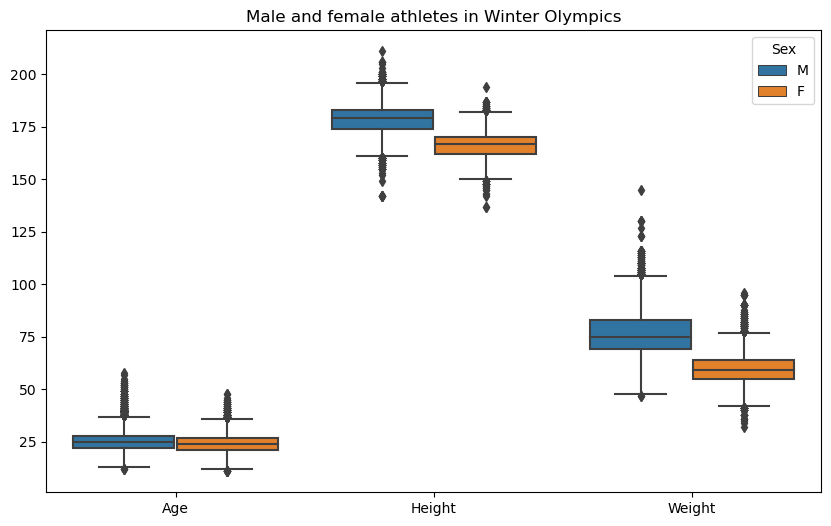

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='variable', y='value', data=winter_olympics, hue='Sex')
plt.xlabel('')
plt.ylabel('')
plt.title('Male and female athletes in Winter Olympics', size=12);

### Task 15. 